# Making predictions and decisions with medical trial data

We have data for 6 studies that have been done on the effect of *specific allergen immunotherapy* (SIT) on eczema and the following success rates have been observed. In each of the trials, the investigator rated whether each patient's condition improved or not.

This data set is from the [Cochrane Database of Systematic Reviews](http://www.cochranelibrary.com/) article cited below, available for free [here](http://onlinelibrary.wiley.com/doi/10.1002/14651858.CD008774.pub2/full). The Cochrane Database is a great resource for high quality data on all sorts of medical trials.

> Tam H., Calderon M.A., Manikam L., Nankervis H., García Núñez I., Williams H.C., Durham S., Boyle R.J. (2016). Specific allergen immunotherapy for the treatment of atopic eczema. *Cochrane Database of Systematic Reviews, Issue 2*. Art. No.: CD008774. DOI: 10.1002/14651858.CD008774.pub2.

| Study          | Improved | Not improved |
|:-------------- | --------:| ------------:|
| Di Rienzo 2014 | 20       | 3            |
| Galli 1994     | 10       | 6            |
| Kaufman 1974   | 13       | 3            |
| Qin 2014       | 35       | 10           |
| Sanchez 2012   | 22       | 9            |
| Silny 2006     | 7        | 3            |
| **Totals**     | **107**  | **34**       |

## Task 1: Modeling
**Build a statistical model for this data set.** As your data, use the total number of patients improved (107) and not improved (34).

**Steps in the modeling process:**
1. Choose and motivate for an appropriate likelihood function for this type of data.
    1. Make sure the support of your likelihood function matches the type of data we are working with.
    2. Describe the unobserved parameter(s) of your model, and describe how it/they can be interpreted.
2. Use a conjugate prior distribution for your likelihood function.
    1. Select appropriate values for the prior hyperparameters and motivate your choice.
    2. Visualize your prior distribution.
3. Compute and visualize the posterior distribution over the unobserved parameter(s) of your model. Also describe what the posterior tells you about the parameter(s).

Feel free to discuss this task with other students in the course, or attempt it on your own if you prefer. Discussing your modeling ideas with other students is a useful way to get feedback on your assumptions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as sts

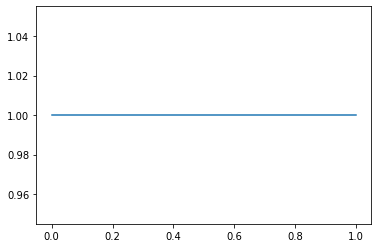

In [12]:
# 1. Choose Binomial Distribution for the likelihood
# The binomial distribution takes 1 parameters, the probability that someone is improved. Between 0, 1.

#The number of people who were improved 
X = 107

#Sample size
N = 107+34

#Choose beta for prior, as it is the conjugate prior for the binomial likelihood dist
x = np.linspace(0, 1, 100)

#Alpha =1, beta=1 for a uniform prior, we know nothing.
alpha_prior = 1
beta_prior = 1
plt.plot(x, sts.beta.pdf(x,alpha_prior,beta_prior))
plt.show()

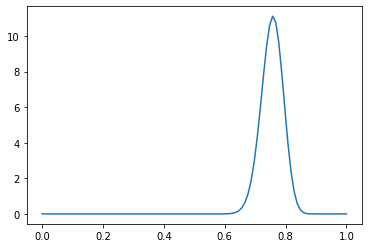

In [14]:
#Using the rules for calculating the posterior for distribution, 
#using the fact that alpha=beta=1 cancel out as seen in the video.
posterior = sts.beta(alpha_prior+X,beta_prior+N-X)

#Visualize teh posterior distribution
plt.plot(x, posterior.pdf(x))

In [4]:
#This tells me that the probability of improving is in the neighbourhood of 75%, given the data.

## Task 2: Questions, predictions, and decisions
1. Posterior predictive distribution: Use your model to predict how many patients would improve if we treated 100 new eczema patients using SIT. Express your answer as a probability distribution over the number of patients improved.
2. Use your posterior to answer these questions:
    1. What is the probability that at least two thirds of eczema patients get better with SIT?
    2. What is the probability that at least 75% of eczema patients get better with SIT?
3. Use your model to decide whether the treatment works or not. Motivate your answer.

0.7552409682178864


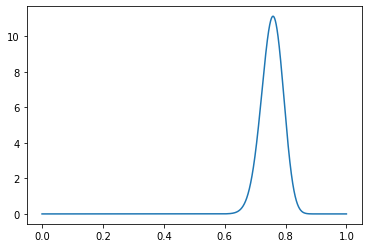

In [5]:
# The posterior perdictive dsitribution for using the model from the previous trial:
sample = posterior.rvs(size = 100000)
print(np.mean(sample))
x = np.linspace(0, 1, 10000)
plt.plot(x, posterior.pdf(x))

In [6]:
#Probability of 2/3 improve
1 - posterior.cdf(2/3)

0.9902521886495699

In [7]:
#Probability of 3/4 improve
1- posterior.cdf(3/4)

0.5706496661069852

Whether or not it works comes down to estimating its effect on the improvement rate, i.e. what is the difference in outcomes if the treatment had not been administered? To answer these questions, we need counterfactuals - a control group. If we consider our prior as a control (I don't think that is a good idea), we see a clear improvement - the data indicate a rate of improvement that far exceeds our prior expectations. Otherwise, we do not have the necessary data to make a statement about whether or not the drug works.

Text(0.5, 1.0, 'Posterior Prediction Distribution')

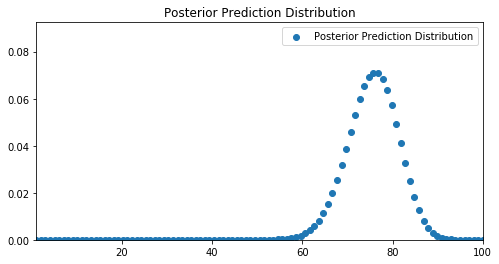

In [15]:
# beta binomial posterior predictive distribution
from scipy.special import beta,comb

x1 = 107
N = 141
Alpha = alpha_prior + 107
Beta = beta_prior + N - x1

N_1 = 100

def beta_binomial_pmf(n, x, a, b):
    return comb(n, x) * beta(x+a, n-x+b) / beta(a,b)

x = np.linspace(0, 100, 100)
pmf = beta_binomial_pmf(N_1, x, Alpha, Beta)
# Plot the pdf
plt.figure(figsize=(8, 4))
plt.scatter(x, pmf, label='Posterior Prediction Distribution')
plt.xlim(1, 100)
plt.ylim(0, max(pmf)*1.3)
plt.legend()
plt.title('Posterior Prediction Distribution')